# SENTIMENT ANALYSIS DURING INDONESIA'S ELECTION 2019
In this Jupyter Notebook, we will delve into the world of sentiment analysis by exploring how social media users expressed their sentiments during the 2019 Indonesian election. The 2019 election was a pivotal moment in Indonesian politics, and it generated a wealth of online conversations and opinions. Our analysis will be based on a dataset containing tweets from Twitter platform. 

In [4]:
import pandas as pd

In [5]:
df_twitter = pd.read_csv("C:/Users/ejhas/OneDrive/Documents/miracles/JOBS/AI Bootcamp/project1/Dataset/tweet.csv")
#df_twitter = df_twitter.rename(columns={'Unnamed: 0': '', 'column2': 'sentiment', 'column3': 'tweet'})

In [6]:
# Missing value percentage checking
missing_percentage = (df_twitter.isnull().sum() / len(df_twitter)) * 100

# Show the missing percentage
print(missing_percentage)

Unnamed: 0    0.0
sentimen      0.0
tweet         0.0
dtype: float64


In [7]:
df_twitter

,Unnamed: 0,sentimen,tweet
0,0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...
1,1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib..."
2,2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik...."
3,3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p..."
4,4,negatif,Negara kita ngutang buat bngun infrastruktur y...
...,...,...,...
1810,1810,netral,Negarawan sejati sll bangga dan mengedepankan ...
1811,1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekon...
1812,1812,netral,Mari bangun bangsa dgn mendukung perekonomian ...
1813,1813,netral,Bantu majukan perekonomian bangsa bersama Pak ...


In [8]:
#!pip install scikit-learn
#!pip install nlp_id

### Tweet Removal

In [9]:
import re

In [10]:
def clean_tweet(tweet):
    # Remove hashtags
    tweet = re.sub(r"#\w+", "", tweet)

    # Remove non-alphanumeric characters
    tweet = re.sub(r"[^\w\s]+", "", tweet)

    # Remove extra spaces
    tweet = re.sub(r"\s+", " ", tweet)
    
     # Remove white spaces
    tweet = re.sub(' +', ' ', tweet)
    return tweet.strip()

In [11]:
# Convert non-string data to strings and apply the clean_tweet function to the "tweet" column
df_twitter['tweet'] = df_twitter['tweet'].apply(lambda x: clean_tweet(str(x)))

In [12]:
# Display the original and cleaned tweets
display(df_twitter['tweet'])

0       Kata prabowo Indonesia tidak dihargai bangsa a...
1       Batuan Langka Tasbih Jokowi Hadiah dari Habib ...
2       Di era Jokowi ekonomi Indonesia semakin baik p...
3       Bagi Sumatera Selatan Asian Games berdampak pd...
4       Negara kita ngutang buat bngun infrastruktur y...
                              ...                        
1810    Negarawan sejati sll bangga dan mengedepankan ...
1811    1 HRS ceramah di Damai Indonesiaku 2 Perekonom...
1812    Mari bangun bangsa dgn mendukung perekonomian ...
1813    Bantu majukan perekonomian bangsa bersama Pak ...
1814    Pak jokowi mengubah cara pandang ekonomi Kini ...
Name: tweet, Length: 1815, dtype: object

### Punctuation Removal

In [13]:
def remove_punctuation(text):
    if isinstance(text, str):
        # Apply punctuation removal only to string values
        cleaned_text = re.sub(r'[^\w\s]', '', text)
        return cleaned_text
    else:
        # Return the input as is for non-string values
        return text

In [14]:
# Apply the remove_punctuation function to the "tweet" column
df_twitter['tweet'] = df_twitter['tweet'].apply(remove_punctuation)

In [15]:
# Display the clenaed text
display(df_twitter['tweet'])

0       Kata prabowo Indonesia tidak dihargai bangsa a...
1       Batuan Langka Tasbih Jokowi Hadiah dari Habib ...
2       Di era Jokowi ekonomi Indonesia semakin baik p...
3       Bagi Sumatera Selatan Asian Games berdampak pd...
4       Negara kita ngutang buat bngun infrastruktur y...
                              ...                        
1810    Negarawan sejati sll bangga dan mengedepankan ...
1811    1 HRS ceramah di Damai Indonesiaku 2 Perekonom...
1812    Mari bangun bangsa dgn mendukung perekonomian ...
1813    Bantu majukan perekonomian bangsa bersama Pak ...
1814    Pak jokowi mengubah cara pandang ekonomi Kini ...
Name: tweet, Length: 1815, dtype: object

### Special Character Removal

In [16]:
def remove_special_character(text):
    # Remove special characters using a regular expression
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return cleaned_text

In [17]:
# Apply the remove_special_character function to the "tweet" column
df_twitter['tweet'] = df_twitter['tweet'].apply(remove_special_character)

In [18]:
# Display the original and cleaned tweets
display(df_twitter['tweet'])

0       Kata prabowo Indonesia tidak dihargai bangsa a...
1       Batuan Langka Tasbih Jokowi Hadiah dari Habib ...
2       Di era Jokowi ekonomi Indonesia semakin baik p...
3       Bagi Sumatera Selatan Asian Games berdampak pd...
4       Negara kita ngutang buat bngun infrastruktur y...
                              ...                        
1810    Negarawan sejati sll bangga dan mengedepankan ...
1811    1 HRS ceramah di Damai Indonesiaku 2 Perekonom...
1812    Mari bangun bangsa dgn mendukung perekonomian ...
1813    Bantu majukan perekonomian bangsa bersama Pak ...
1814    Pak jokowi mengubah cara pandang ekonomi Kini ...
Name: tweet, Length: 1815, dtype: object

### Emoji Removal

In [19]:
def remove_emoji_emoticon(text):
    # Remove emojis and emoticons using a regular expression
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
        u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
        u"\U0001F1E0-\U0001F1FF"  # Flags (iOS)
        "]+", flags=re.UNICODE)
    cleaned_text = emoji_pattern.sub(r'', text)
    return cleaned_text

In [20]:
# Apply the remove_emoji_emoticon function to the "tweet" column
df_twitter['tweet'] = df_twitter['tweet'].apply(remove_emoji_emoticon)

In [21]:
# Display the original and cleaned tweets
display(df_twitter['tweet'])

0       Kata prabowo Indonesia tidak dihargai bangsa a...
1       Batuan Langka Tasbih Jokowi Hadiah dari Habib ...
2       Di era Jokowi ekonomi Indonesia semakin baik p...
3       Bagi Sumatera Selatan Asian Games berdampak pd...
4       Negara kita ngutang buat bngun infrastruktur y...
                              ...                        
1810    Negarawan sejati sll bangga dan mengedepankan ...
1811    1 HRS ceramah di Damai Indonesiaku 2 Perekonom...
1812    Mari bangun bangsa dgn mendukung perekonomian ...
1813    Bantu majukan perekonomian bangsa bersama Pak ...
1814    Pak jokowi mengubah cara pandang ekonomi Kini ...
Name: tweet, Length: 1815, dtype: object

### HTTPS REMOVAL

In [22]:
def remove_url_and_twitter_pics(text):
    # Delete URL
    df_twitter['tweet'] = df_twitter['tweet'].apply(lambda x: re.sub(r'http\S+|www.\S+', '', x, flags=re.MULTILINE))
    # Delete link to pictures
    df_twitter['tweet'] = df_twitter['tweet'].apply(lambda x: re.sub(r'pic.twitter.com/\S+', '', x))
    return tweets_no_url_no_pics

In [23]:
df_twitter['tweet'].sample(10)

440     Mamfaat yang dapat diperoleh dari pelaksanaan ...
843     Sangat jelas skali kwalitas 02 yg cerdas dan b...
792     Trimakasih KemenPU Trimakasih tniad Trimakasih...
871     Semoga gaji guru madrasah bisa tersejahtrakans...
1691    subhanallah dgn krendahan hatinya prabowo sand...
390     Pecatan gak ngerti ekonomi  Ngerti nya di sawe...
1121    Pada masa pemerintahan Jokowi laju kenaikan ha...
681     Jangankan di singapore ci pas w ke yurop aja d...
145     Pada debat kemarin katanya anda berdua prabowo...
1259    Presiden Jokowi Telah membangun Indonesia Mula...
Name: tweet, dtype: object

### Slang Word Conversion

In [24]:
import re
import pandas as pd

# Load the slang word dictionary from 'slangwords.txt'
kamusSlang = eval(open("C:/Users/ejhas/OneDrive/Documents/miracles/JOBS/AI Bootcamp/project1/Dataset/slangwords.txt").read())

# Define a function to convert slang words to standard words
def convertToSlangword(text):
    # Create a regex pattern to match slang words
    pattern = re.compile(r'\b(' + '|'.join(kamusSlang.keys()) + r')\b')

    # Function to replace slang words with standard words
    def replace_slang(match):
        return kamusSlang[match.group()]

    # Apply the pattern substitution to the text
    filtered_text = pattern.sub(replace_slang, text)

    return filtered_text.lower()  # Optionally convert to lowercase

# Apply the conversion function to your DataFrame's 'tweet' column
df_twitter['tweet'] = df_twitter['tweet'].apply(convertToSlangword)


In [25]:
print(df_twitter['tweet'])

0       kata prabowo indonesia tidak dihargai bangsa a...
1       batuan langka tasbih jokowi hadiah dari habib ...
2       di era jokowi ekonomi indonesia semakin baik p...
3       bagi sumatera selatan asian games berdampak pa...
4       negara kita hutang buat bngun infrastruktur ya...
                              ...                        
1810    negarawan sejati selalu bangga dan mengedepank...
1811    1 hrs ceramah di damai indonesiaku 2 perekonom...
1812    mari bangun bangsa dengan mendukung perekonomi...
1813    bantu majukan perekonomian bangsa bersama pak ...
1814    pak jokowi mengubah cara pandang ekonomi kini ...
Name: tweet, Length: 1815, dtype: object


### ALAY CONVERSION

In [26]:
# Load the alays word dictionary 
kamusAlay = pd.read_csv("C:/Users/ejhas/OneDrive/Documents/miracles/JOBS/AI Bootcamp/project1/Dataset/kamusalay.csv", header=None, names=['slang', 'conversion'])
kamusAlay

,slang,conversion
0,ajh,saja
1,ajj,saja
2,akoh,aku
3,amaca,ah masa
4,amuh,kamu
...,...,...
233,yap,ya
234,yaw,ya
235,yoi,iya
236,yups,ya


In [27]:
# Create a dictionary from the DataFrame
kamusSlang = dict(zip(kamusAlay['slang'], kamusAlay['conversion']))

# Define a function to convert slang words to standard words
def convertToSlangword(text):
    # Create a regex pattern to match slang words
    pattern = re.compile(r'\b(' + '|'.join(kamusSlang.keys()) + r')\b')

    # Function to replace slang words with standard words
    def replace_slang(match):
        return kamusSlang[match.group()]

    # Apply the pattern substitution to the text
    filtered_text = pattern.sub(replace_slang, text)

    return filtered_text.lower()  # Optionally convert to lowercase

# Apply the conversion function to your DataFrame's 'tweet' column
df_twitter['tweet'] = df_twitter['tweet'].apply(convertToSlangword)


In [28]:
df_twitter['tweet'].sample(10)

483     dampak ekonomi tidak langsung asian games 2018...
559                    gaji ditransfer saja hemat ongkos 
1345    daftar janji prabowosandi gaji pns hingga diri...
1023    ketika seorang presiden menganggap mainan boca...
634     tidak ambil gaji tapi perusahaanya siap mengua...
1038    jika mau harga bahan pokok terjangkau tenaga m...
982     sudah ekonomi tidak tumbuh pemerataan semakin ...
480     total dampak dari asian games 2018 berkontribu...
1526    ps bolakbalik menyinggung soal deindustrialisa...
1736    barangkali karena trend pertumbuhan ekonomi 20...
Name: tweet, dtype: object

### SHORTWORDS CONVERSION

In [29]:
# Load the shortwords dictionary 
shortwords = pd.read_csv("C:/Users/ejhas/OneDrive/Documents/miracles/JOBS/AI Bootcamp/project1/Dataset/singkatan-lib.csv", header=None, names=['short', 'conversion'])
shortwords

,short,conversion
0,aja,saja
1,akn,akan
2,aku,saya
3,amien,aamiin
4,amin,aamiin
...,...,...
180,y,ya
181,yg,yang
182,yng,yang
183,endonesa,indonesia


In [30]:
# Create a dictionary from the DataFrame
kamusSlang = dict(zip(shortwords['short'], shortwords['conversion']))

# Define a function to convert short words to standard words
def convertToShortWord(text):
    # Create a regex pattern to match short words
    pattern = re.compile(r'\b(' + '|'.join(re.escape(k) for k in kamusSlang.keys()) + r')\b')

    # Function to replace short words with standard words
    def replace_short(match):
        return kamusSlang[match.group()]

    # Apply the pattern substitution to the text
    filtered_text = pattern.sub(replace_short, text)

    return filtered_text.lower()  # Optionally convert to lowercase

# Apply the conversion function to your DataFrame's 'tweet' column
df_twitter['tweet'] = df_twitter['tweet'].apply(convertToShortWord)


In [31]:
print(df_twitter['tweet'])

0       kata prabowo indonesia tidak dihargai bangsa a...
1       batuan langka tasbih jokowi hadiah dari habib ...
2       di era jokowi ekonomi indonesia semakin baik p...
3       bagi sumatera selatan asian games berdampak pa...
4       negara kita hutang buat bngun infrastruktur ya...
                              ...                        
1810    negarawan sejati selalu bangga dan mengedepank...
1811    1 harus ceramah di damai indonesiaku 2 perekon...
1812    mari bangun bangsa dengan mendukung perekonomi...
1813    bantu majukan perekonomian bangsa bersama pak ...
1814    pak jokowi mengubah cara pandang ekonomi kini ...
Name: tweet, Length: 1815, dtype: object


### STOPWORDS REMOVAL

In [32]:
# %%time
# !pip uninstall scikit-learn nlp_id

In [33]:
#3pip install scikit-learn==0.22 nlp_id==0.1.12.0


In [2]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from nlp_id import StopWord

stopword = StopWord()
stop_words = stopword.get_stopword()
print(stop_words)

['ada', 'adalagi', 'adalah', 'adanya', 'adapun', 'agak', 'agak-agak', 'agaknya', 'agar', 'aja', 'akan', 'akankah', 'akankan', 'akhir', 'akhir-akhirnya', 'akhirannya', 'akhiri', 'akhirinya', 'akhirnya', 'aku', 'akulah', 'akunya', 'akurat', 'akutu', 'ala', 'alamak', 'alhamdulillah', 'alhasil', 'amat', 'amat-amat', 'amatlah', 'anda', 'anda-anda', 'andai', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apa-apanya', 'apaan', 'apabila', 'apaitu', 'apakah', 'apalagi', 'apanya', 'apasaja', 'apatah', 'apesnya', 'arah', 'artinya', 'asal', 'asalkan', 'asumsinya', 'asumsikan', 'atas', 'atas-atas', 'atas-batas', 'ataspun', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagi-bagi', 'bagian', 'bagikan', 'bahasakan', 'bahasanya', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bak', 'bakal', 'bakal-bakal', 'bakalan', 'balik', 'balikan', 'balikkan', 'banget', 'banget-banget', 'banyak', 'barangkali', 'baru', 'baru-baru', 'bawah',

In [34]:
# Function to remove stopwords from a text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the remove_stopwords function to the 'tweet' column
df_twitter['tweet'] = df_twitter['tweet'].apply(remove_stopwords)

In [35]:
print(df_twitter['tweet'])

0       prabowo indonesia dihargai bangsa asing berita...
1       batuan langka tasbih jokowi hadiah habib luthf...
2       era jokowi ekonomi indonesia pictwittercomw2yt...
3       sumatera selatan asian games berdampak ekonomi...
4       negara hutang bngun infrastruktur dipake masya...
                              ...                        
1810    negarawan sejati bangga mengedepankan harga ba...
1811    1 ceramah damai indonesiaku 2 perekonomian mem...
1812    mari bangun bangsa mendukung perekonomian nega...
1813    bantu majukan perekonomian bangsa jokowi yuk h...
1814    jokowi mengubah pandang ekonomi orang terhubun...
Name: tweet, Length: 1815, dtype: object


### Stemming or Lemmatization

In [38]:
# !pip install Sastrawi
# !pip install swifter

  Using cached Sastrawi-1.0.1-py2.py3-none-any.whl (209 kB)
  Using cached swifter-1.4.0.tar.gz (1.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.1/1.1 MB 11.1 MB/s eta 0:00:00
     ---------------------------------------- 78.3/78.3 kB ? eta 0:00:00
     -------------------------------------- 153.2/153.2 kB 8.9 MB/s eta 0:00:00
     -------------------------------------- 143.0/143.0 kB 8.3 MB/s eta 0:00:00
  Using cached toolz-0.12.0-py3-none-any.whl (55 kB)
  Using cached partd-1.4.1-py3-none-any.whl (18 kB)
  Using cached locket-1.0.0-py2.py3-none-any.whl (4.4 kB)
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16519 sha256=07604335df5f02538a88035f2c74864d0280ecaaacf978e09232716264215f5f
  Stored in directory: c:\users\ejhas\appdata\local\pip\cache\wheels\ce\c0\e1\019a976b22957c889d3e3993ebc893553a5ee5bdd92f68f1cf
Successfully built swifter


In [39]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

In [40]:
# Create a stemmer instance
stemmer = StemmerFactory().create_stemmer()

In [41]:
import tqdm

In [ ]:
%%time

# Apply stemming to the 'tweet' column and print the results
df_twitter['tweet'] = [stemmer.stem(x) for x in tqdm.tqdm(df_twitter['tweet'])]
print(df_twitter['tweet'])

 47%|█████████████████████████████████████▍                                         | 861/1815 [07:48<05:15,  3.02it/s]

### Word Tokenization

In [62]:
label_encoder = LabelEncoder()
df_twitter['target'] = label_encoder.fit_transform(df_twitter['sentimen'])

label_encoder.classes_, label_encoder.transform(label_encoder.classes_)

(array(['negatif', 'netral', 'positif'], dtype=object), array([0, 1, 2]))

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#train_idx, test_idx = train_test_split(np.arange(len(df_twitter)), test_size=0.2, random_state=95)
X_train_text, X_test_text, Y_train, Y_test = train_test_split(df_twitter["tweet"], 
                                                    df_twitter['target'] , 
                                                    test_size=0.2,
                                                    random_state=95)

In [125]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train_text.tolist())
X_test = vectorizer.transform(X_test_text.tolist())

# pos_count = 1 + X_train[Y_train == 2].sum(0)
# neg_count = 1 + X_train[Y_train == 0].sum(0)
# pos_weights = np.array(pos_count / pos_count.sum())[0]
# neg_weights = np.array(neg_count / neg_count.sum())[0]

# #np.log(np.array(pos_count / pos_count.sum() / (neg_count / neg_count.sum())))[0]
# #weights = np.array(pos_count / pos_count.sum() + neg_count / neg_count.sum())[0]

# sentiment_indices = np.union1d(np.argsort(pos_weights)[::-1][:500], np.argsort(neg_weights)[::-1][:500],)

X_train = X_train.toarray()#[:, sentiment_indices]
X_test = X_test.toarray()#[:, sentiment_indices]

# X_train = (np.log(pos_weights / neg_weights) * X_train.toarray())#[:, sentiment_indices]
# X_test = (np.log(pos_weights / neg_weights) * X_test.toarray())#[:, sentiment_indices]

In [126]:
%%time

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, Y_train)

np.mean(rf.predict(X_train) == Y_train), np.mean(rf.predict(X_test) == Y_test)

CPU times: total: 7.77 s
Wall time: 12.4 s


(0.9979338842975206, 0.559228650137741)

In [123]:
# count_vectorizer all features: 0.5564738292011019
# tfidf_vectorizer all features: 0.5757575757575758

0.5674931129476584

### MODEL EVALUATION

In [129]:
Y_pred = rf.predict(X_test)

In [130]:
pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1,2
Actual,,,
0,58,42,13
1,17,87,15
2,28,45,58


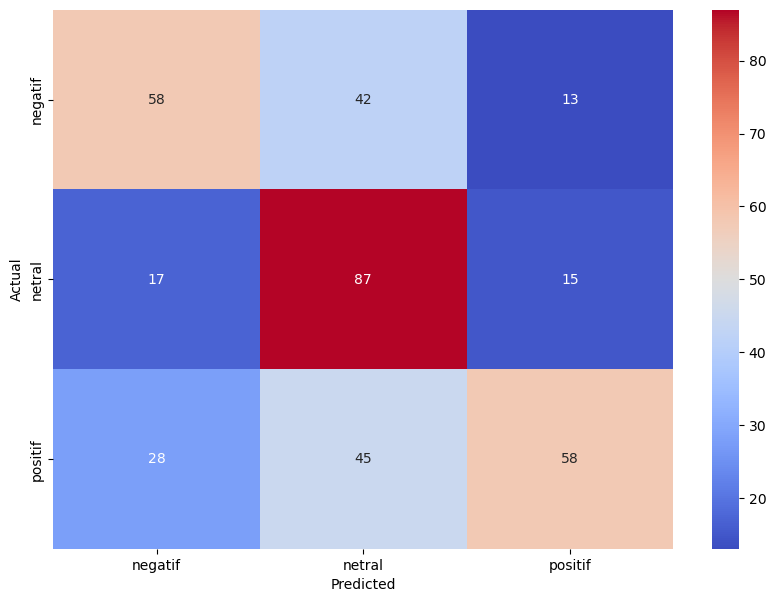

In [133]:
# confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['negatif','netral','positif'], yticklabels=['negatif','netral','positif'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [135]:
# accuracy, recall, precission, F1 score
report = classification_report(Y_test, Y_pred)
print(report)

# calcalate and print accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy}')

              precision    recall  f1-score   support

           0       0.56      0.51      0.54       113
           1       0.50      0.73      0.59       119
           2       0.67      0.44      0.53       131

    accuracy                           0.56       363
   macro avg       0.58      0.56      0.56       363
weighted avg       0.58      0.56      0.55       363

Accuracy: 0.559228650137741
